In [1]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import snscrape.base
import snscrape.modules.twitter as sntwitter
import pandas as pd
import itertools

In [7]:
# our search term, using syntax for Twitter's Advanced Search
search = '#suicide since:2022-09-01 until:2022-10-01 lang:en' # -filter:nativeretweets'

# the scraped tweets, this is a generator
scraped_tweets = sntwitter.TwitterSearchScraper(search).get_items()

# slicing the generator to keep only the first 10000 tweets
sliced_scraped_tweets = itertools.islice(scraped_tweets, 10000)

# convert to a DataFrame and keep only relevant columns
df = pd.DataFrame(sliced_scraped_tweets)[['date','content']]

In [10]:
df.shape

(5837, 2)

In [8]:
df.head()

,date,content
0,2022-09-30 23:55:55+00:00,WE ALL HAVE PAINFUL EXPERIENCES Suicidal Call...
1,2022-09-30 23:41:34+00:00,British girl suicide 5 years ago 'Internet inf...
2,2022-09-30 23:22:12+00:00,"To wrap up National Suicide Prevention Month, ..."
3,2022-09-30 23:19:38+00:00,September is #Suicide #awareness month. Lets n...
4,2022-09-30 23:00:41+00:00,Most people often do not die by suicide becaus...


In [9]:
df.columns

Index(['date', 'content'], dtype='object')

## Text Processing

In [ ]:
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import nltk
nltk.download('all')

In [12]:
train_tweets = df.copy()
train_tweets.head()

,date,content
0,2022-09-30 23:55:55+00:00,WE ALL HAVE PAINFUL EXPERIENCES Suicidal Call...
1,2022-09-30 23:41:34+00:00,British girl suicide 5 years ago 'Internet inf...
2,2022-09-30 23:22:12+00:00,"To wrap up National Suicide Prevention Month, ..."
3,2022-09-30 23:19:38+00:00,September is #Suicide #awareness month. Lets n...
4,2022-09-30 23:00:41+00:00,Most people often do not die by suicide becaus...


In [13]:
# Removing URLs
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

In [14]:
df1=train_tweets.copy()
df1['content']=df1['content'].apply(remove_URL)

In [15]:
# Removing the html tags
def remove_html(headline_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',headline_text)

In [16]:
df1['content']=df1['content'].apply(remove_html)
df1.content.values

array(['WE ALL HAVE PAINFUL\xa0 EXPERIENCES Suicidal Call or Text 988 #Helpline\xa0#warriors #courage #fight\xa0#chooselife #trending #socialmedia #trend #nmrk #mission #vets #reachout #yourlifematters #recovery #suicideprevention #suicide #sufferings VIDEO LINK\n ',
       "British girl suicide 5 years ago 'Internet information has an adverse effect' also affects legal and regulatory debate - #information #internet #suicide #debate #legal #girl ",
       'To wrap up National Suicide Prevention Month, a piece I did on 14 Bay Area and LA tattoo artists, many impacted by suicide loss themselves, uniting behind the cause. #NationalSuicidePreventionMonth #tattooartist #tattoo #suicide #SuicideAwareness ',
       ...,
       'Thrilled to pass on the news that Canada will have a #mentalhealth #suicide hotline by end of 2023. ',
       '#JOURNALISTS: Write better stories on #suicide. Keep these guidelines in your back pocket:  @dartcenter',
       '#tornbetweentwoworlds now available on @audi

In [17]:
# Removing Pictures/Tags/Symbols/Emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [18]:
df1['content']=df1['content'].apply(remove_emojis)
df1.content.values

array(['WE ALL HAVE PAINFUL\xa0 EXPERIENCES Suicidal Call or Text 988 #Helpline\xa0#warriors #courage #fight\xa0#chooselife #trending #socialmedia #trend #nmrk #mission #vets #reachout #yourlifematters #recovery #suicideprevention #suicide #sufferings VIDEO LINK\n ',
       "British girl suicide 5 years ago 'Internet information has an adverse effect' also affects legal and regulatory debate - #information #internet #suicide #debate #legal #girl ",
       'To wrap up National Suicide Prevention Month, a piece I did on 14 Bay Area and LA tattoo artists, many impacted by suicide loss themselves, uniting behind the cause. #NationalSuicidePreventionMonth #tattooartist #tattoo #suicide #SuicideAwareness ',
       ...,
       'Thrilled to pass on the news that Canada will have a #mentalhealth #suicide hotline by end of 2023. ',
       '#JOURNALISTS: Write better stories on #suicide. Keep these guidelines in your back pocket:  @dartcenter',
       '#tornbetweentwoworlds now available on @audi

In [19]:
import string

# Removing punctuations
def remove_punct(headline_text):
    table=str.maketrans('','',string.punctuation)
    return headline_text.translate(table)

In [20]:
df1['content']=df1['content'].apply(remove_punct)
df1.content.values

array(['WE ALL HAVE PAINFUL\xa0 EXPERIENCES Suicidal Call or Text 988 Helpline\xa0warriors courage fight\xa0chooselife trending socialmedia trend nmrk mission vets reachout yourlifematters recovery suicideprevention suicide sufferings VIDEO LINK\n ',
       'British girl suicide 5 years ago Internet information has an adverse effect also affects legal and regulatory debate  information internet suicide debate legal girl ',
       'To wrap up National Suicide Prevention Month a piece I did on 14 Bay Area and LA tattoo artists many impacted by suicide loss themselves uniting behind the cause NationalSuicidePreventionMonth tattooartist tattoo suicide SuicideAwareness ',
       ...,
       'Thrilled to pass on the news that Canada will have a mentalhealth suicide hotline by end of 2023 ',
       'JOURNALISTS Write better stories on suicide Keep these guidelines in your back pocket  dartcenter',
       'tornbetweentwoworlds now available on audiblecom  \n\nSelfhelp book for sufferers of \nT

In [21]:
df1.drop(columns=['date'],inplace=True)
refined_data=df1.copy()
refined_data.head()

,content
0,WE ALL HAVE PAINFUL EXPERIENCES Suicidal Call...
1,British girl suicide 5 years ago Internet info...
2,To wrap up National Suicide Prevention Month a...
3,September is Suicide awareness month Lets not ...
4,Most people often do not die by suicide becaus...


## Aspect Based Sentiment Analysis

In [22]:
import os
#!pip install spacy
import spacy
from tqdm import tqdm
import en_core_web_sm
nlp = en_core_web_sm.load()
toy_rev=df1.copy()

In [23]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [24]:
def aspect_based_analysis(toy_rev):
    # toy_rev ---> The final_dataset on which we perform sentiment analysis
    nlp = en_core_web_sm.load()

    # List of emotions that are used to analyze the sentiments
    competitors = ['Depression','Stress','Relationship','Emotions','Finance','Society']
    aspect_terms = []
    comp_terms = []
    easpect_terms = []
    ecomp_terms = []
    enemy = []
    for x in tqdm(range(len(toy_rev['content']))):
        amod_pairs = []
        advmod_pairs = []
        compound_pairs = []
        xcomp_pairs = []
        neg_pairs = []
        eamod_pairs = []
        eadvmod_pairs = []
        ecompound_pairs = []
        eneg_pairs = []
        excomp_pairs = []
        enemlist = []
        if len(str(toy_rev['content'][x])) != 0:
            lines = str(toy_rev['content'][x]).replace('*',' ').replace('-',' ').replace('so ',' ').replace('be ',' ').replace('are ',' ').replace('just ',' ').replace('get ','').replace('were ',' ').replace('When ','').replace('when ','').replace('again ',' ').replace('where ','').replace('how ',' ').replace('has ',' ').replace('Here ',' ').replace('here ',' ').replace('now ',' ').replace('see ',' ').replace('why ',' ').split('.')       
            for line in lines:
                enem_list = []
                for eny in competitors:
                    enem = re.search(eny,line)
                    if enem is not None:
                        enem_list.append(enem.group())
                if len(enem_list)==0:
                    doc = nlp(line)
                    str1=''
                    str2=''
                    for token in doc:
                        if token.pos_ is 'NOUN':
                            for j in token.lefts:
                                if j.dep_ == 'compound':
                                    compound_pairs.append((j.text+' '+token.text,token.text))
                                    if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                        str1 = j.text+' '+token.text
                                        amod_pairs.append(j.text+' '+token.text)
                                        for k in j.lefts:
                                            if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                                str2 = k.text+' '+j.text+' '+token.text
                                                amod_pairs.append(k.text+' '+j.text+' '+token.text)
                                        mtch = re.search(re.escape(str1),re.escape(str2))
                                        if mtch is not None:
                                            amod_pairs.remove(str1)
                        if token.pos_ is 'VERB':
                            for j in token.lefts:
                                if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                    advmod_pairs.append(j.text+' '+token.text)
                                if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                  neg_pairs.append(j.text+' '+token.text)
                            for j in token.rights:
                                if j.dep_ is 'advmod'and j.pos_ is 'ADV':
                                    advmod_pairs.append(token.text+' '+j.text)
                        if token.pos_ is 'ADJ':
                            for j,h in zip(token.rights,token.lefts):
                                if j.dep_ is 'xcomp' and h.dep_ is not 'neg':
                                    for k in j.lefts:
                                        if k.dep_ is 'aux':
                                            xcomp_pairs.append(token.text+' '+k.text+' '+j.text)
                                elif j.dep_ is 'xcomp' and h.dep_ is 'neg':
                                    if k.dep_ is 'aux':
                                            neg_pairs.append(h.text +' '+token.text+' '+k.text+' '+j.text)
                
                else:
                    enemlist.append(enem_list)
                    doc = nlp(line)
                    str1=''
                    str2=''
                    for token in doc:
                        if token.pos_ is 'NOUN':
                            for j in token.lefts:
                              if j.dep_ == 'compound':
                                ecompound_pairs.append((j.text+' '+token.text,token.text))
                                if j.dep_ is 'amod' and j.pos_ is 'ADJ': #primary condition
                                    str1 = j.text+' '+token.text
                                    eamod_pairs.append(j.text+' '+token.text)
                                    for k in j.lefts:
                                        if k.dep_ is 'advmod': #secondary condition to get adjective of adjectives
                                            str2 = k.text+' '+j.text+' '+token.text
                                            eamod_pairs.append(k.text+' '+j.text+' '+token.text)
                                    mtch = re.search(re.escape(str1),re.escape(str2))
                                    if mtch is not None:
                                        eamod_pairs.remove(str1)
                        if token.pos_ is 'VERB':
                            for j in token.lefts:
                                if j.dep_ is 'advmod' and j.pos_ is 'ADV':
                                    eadvmod_pairs.append(j.text+' '+token.text)
                                if j.dep_ is 'neg' and j.pos_ is 'ADV':
                                  eadvmod_pairs.append(token.text+' '+j.text)
                        if token.pos_ is 'ADJ':
                            for j in token.rights:
                                if j.dep_ is 'xcomp':
                                    for k in j.lefts:
                                        if k.dep_ is 'aux':
                                            excomp_pairs.append(token.text+' '+k.text+' '+j.text)
            pairs = list(set(amod_pairs+advmod_pairs+neg_pairs+xcomp_pairs))
            epairs = list(set(eamod_pairs+eadvmod_pairs+eneg_pairs+excomp_pairs))
            for i in range(len(pairs)):
                if len(compound_pairs)!=0:
                    for comp in compound_pairs:
                        mtch = re.search(re.escape(comp[1]),re.escape(pairs[i]))
                        if mtch is not None:
                            pairs[i] = pairs[i].replace(mtch.group(),comp[0])
            for i in range(len(epairs)):
                if len(ecompound_pairs)!=0:
                    for comp in ecompound_pairs:
                        mtch = re.search(re.escape(comp[1]),re.escape(epairs[i]))
                        if mtch is not None:
                            epairs[i] = epairs[i].replace(mtch.group(),comp[0])
                
        aspect_terms.append(pairs)
        comp_terms.append(compound_pairs)
        easpect_terms.append(epairs)
        ecomp_terms.append(ecompound_pairs)
        enemy.append(enemlist)
    toy_rev['compound_nouns'] = comp_terms
    toy_rev['aspect_keywords'] = aspect_terms
    toy_rev['competition'] = enemy
    toy_rev['competition_comp_nouns'] = ecomp_terms
    toy_rev['competition_aspects'] = easpect_terms
    
    ## Creating a compound vader score
    cs = []
    for row in range(len(toy_rev)):
        cs.append(sid.polarity_scores(toy_rev['content'].iloc[row])['compound'])
    toy_rev['compound_vader_score'] = cs

    return toy_rev
                          

In [25]:
xy=aspect_based_analysis(refined_data)
xy

100%|██████████| 5837/5837 [01:20<00:00, 72.11it/s]


,content,compound_nouns,aspect_keywords,competition,competition_comp_nouns,competition_aspects,compound_vader_score
0,WE ALL HAVE PAINFUL EXPERIENCES Suicidal Call...,"[(courage chooselife, chooselife), (fight choo...",[],[],[],[],-0.9191
1,British girl suicide 5 years ago Internet info...,"[(girl suicide, suicide), (Internet informatio...",[],[],[],[],-0.8885
2,To wrap up National Suicide Prevention Month a...,"[(LA artists, artists), (suicide loss, loss)]",[],[],[],[],-0.9501
3,September is Suicide awareness month Lets not ...,"[(Suicide month, month), (awareness month, mon...",[],[],[],[],-0.3346
4,Most people often do not die by suicide becaus...,[],[often die],[],[],[],-0.9108
...,...,...,...,...,...,...,...
5832,PTSDchat Next week we’ll start the Sept “Suici...,"[(experiences questions, questions)]",[PTSDchat start],[],[],[],0.2960
5833,Dilworth Victim tells independent inquiry some...,[],[],[],[],[],-0.9545
5834,Thrilled to pass on the news that Canada will ...,"[(mentalhealth hotline, hotline), (suicide hot...",[],[],[],[],-0.3818
5835,JOURNALISTS Write better stories on suicide Ke...,"[(pocket dartcenter, dartcenter)]",[],[],[],[],-0.3818


## Word Cloud

In [26]:
df=xy.copy()

In [27]:
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go

def plotly_wordcloud(text):
    wc = WordCloud(stopwords = set(STOPWORDS),
                   max_words = 20,
                   max_font_size = 10)
    wc.generate(text)
    
    word_list=[]
    freq_list=[]
    fontsize_list=[]
    position_list=[]
    orientation_list=[]
    color_list=[]

    for (word, freq), fontsize, position, orientation, color in wc.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)
        
    # get the positions
    x=[]
    y=[]
    for i in position_list:
        x.append(i[0])
        y.append(i[1])
            
    # get the relative occurence frequencies
    new_freq_list = []
    for i in freq_list:
        new_freq_list.append(i*100)
    new_freq_list
    
    trace = go.Scatter(x=x, 
                       y=y, 
                       textfont = dict(size=new_freq_list,
                                       color=color_list),
                       hoverinfo='text',
                       hovertext=['{0}{1}'.format(w, f) for w, f in zip(word_list, freq_list)],
                       mode='text',  
                       text=word_list
                      )
    
    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    
    fig = go.Figure(data=[trace], layout=layout)
    
    return fig

In [28]:
df.columns

Index(['content', 'compound_nouns', 'aspect_keywords', 'competition',
       'competition_comp_nouns', 'competition_aspects',
       'compound_vader_score'],
      dtype='object')

In [30]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

There are 47015 words in the combination of all review.


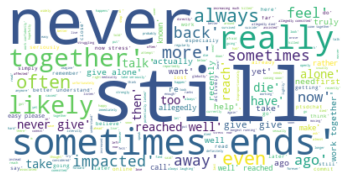

In [31]:
text = " ".join(review for review in df.aspect_keywords.astype('string')).lower()
print (f"There are {len(text)} words in the combination of all review.")

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 17871 words in the combination of all review.


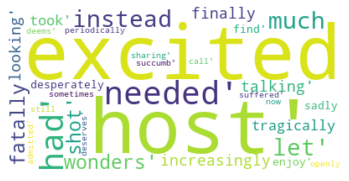

In [32]:
text = " ".join(review for review in df.competition_aspects.astype('string')).lower()
print (f"There are {len(text)} words in the combination of all review.")

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()